<h1>Project 2 United Kingdom Accidents

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
ukacc = pd.read_csv('dataset//uk_road_accident.csv')

In [3]:
ukacc

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
ukacc.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [5]:
ukacc['Accident Date'] = pd.to_datetime(ukacc['Accident Date'], dayfirst=True, errors = 'coerce')

In [6]:
ukacc.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [7]:
ukacc.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [8]:
ukacc['Latitude'] = ukacc ['Latitude'].fillna(ukacc['Latitude'].mode()[0])

In [9]:
ukacc['Longitude'] = ukacc ['Longitude'].fillna(ukacc['Longitude'].mode()[0])
ukacc['Road_Surface_Conditions'] = ukacc ['Road_Surface_Conditions'].fillna('unaccounted')
ukacc['Road_Type'] = ukacc ['Road_Type'].fillna('unaccounted')
ukacc['Weather_Conditions'] = ukacc ['Weather_Conditions'].fillna(ukacc['Weather_Conditions'].mode()[0])
ukacc['Urban_or_Rural_Area'] = ukacc ['Urban_or_Rural_Area'].fillna(ukacc['Urban_or_Rural_Area'].mode()[0])

In [10]:
ukacc.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [11]:
ukacc['Accident Date'] = ukacc ['Accident Date'].fillna(ukacc['Accident Date'].mode()[0])
ukacc['Year'] = ukacc['Accident Date'].dt.year
ukacc['Month'] = ukacc['Accident Date'].dt.month
ukacc['Day'] = ukacc['Accident Date'].dt.day
ukacc['DayOfWeek'] = ukacc['Accident Date'].dt.dayofweek

In [12]:
ukacc.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Exploratory Data Analytics

<h2> 1.how many traffic accident were serious

In [13]:
ukacc[ukacc ['Accident_Severity'] == 'Serious']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2021-02-11,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,Fine no high winds,Taxi/Private hire car,2021,2,11,3
3,200701BS66128,Serious,2021-02-11,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
5,200701BS67159,Serious,2021-02-11,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,2022-02-11,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car,2022,2,11,4
660645,201091NL05842,Serious,2021-02-11,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,2021,2,11,3
660672,201091NM01085,Serious,2021-02-11,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660677,201091NM01964,Serious,2021-02-11,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,2,11,3


<h2>Insight#1

<h3>There's 88217 that's serious

<h2>2.How many that are in Slight conditions on accidents severity

In [14]:
ukacc[ukacc ['Accident_Severity'] == 'Slight']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,Fine no high winds,Other vehicle,2019,9,3,1
8,200701BS67515,Slight,2021-02-11,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
9,200701BS67543,Slight,2021-02-11,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2021,2,11,3
13,200701BS67853,Slight,2019-11-08,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Wet or damp,Single carriageway,Urban,Other,Car,2019,11,8,4
14,200701BS67859,Slight,2019-11-01,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Dry,One way street,Urban,Fine no high winds,Car,2019,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,2021-02-11,57.572162,Daylight,Highland,-3.930799,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2021-02-11,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660675,201091NM01881,Slight,2021-02-11,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3


<h2>Insight#2
<h3>theres 53801 that are in slight conditons

<h2>3.how many that are in broad daylight that got into an accident

In [15]:
ukacc[ukacc ['Light_Conditions'] == 'Daylight']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
3,200701BS66128,Serious,2021-02-11,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
5,200701BS67159,Serious,2021-02-11,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,9,5,3
9,200701BS67543,Slight,2021-02-11,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660672,201091NM01085,Serious,2021-02-11,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2021-02-11,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660676,201091NM01935,Slight,2021-02-11,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3


<h2>Insight#3
<h3>Theres 484880 that got into an accident in broad daylight

<h2>4.how many that got accident in District Area Kensington and Chelsea	

In [16]:
ukacc[ukacc ['District Area'] == 'Kensington and Chelsea']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2021-02-11,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,Fine no high winds,Taxi/Private hire car,2021,2,11,3
3,200701BS66128,Serious,2021-02-11,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533088,201001TB00796,Slight,2021-02-11,51.489306,Darkness - lights lit,Kensington and Chelsea,-0.175749,2,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
533316,201001TE00005,Serious,2021-02-11,51.520998,Daylight,Kensington and Chelsea,-0.213258,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
533327,201001TE00016,Serious,2022-02-02,51.497193,Daylight,Kensington and Chelsea,-0.168230,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2022,2,2,2
533337,201001TE00029,Serious,2022-03-12,51.480287,Darkness - lights lit,Kensington and Chelsea,-0.185614,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,3,12,5


<h2>Insight#4
<h3>Theres 2799 that got into an accident in Kensington and Chelsea

<h2>5.how many that got accident in District Area Highland	

In [17]:
ukacc[ukacc ['District Area'] == 'Highland']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
169770,200791NE00016,Slight,2019-01-01,57.793313,Darkness - no lighting,Highland,-4.037324,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Bus or coach (17 or more pass seats),2019,1,1,1
169771,200791NE00427,Serious,2019-01-06,57.808013,Daylight,Highland,-4.045054,4,2,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2019,1,6,6
169772,200791NE00428,Slight,2019-01-06,57.780080,Daylight,Highland,-4.005126,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,1,6,6
169773,200791NE00744,Slight,2019-01-10,57.479262,Daylight,Highland,-6.345396,1,1,Snow,Single carriageway,Rural,Snowing + high winds,Car,2019,1,10,3
169774,200791NE00798,Slight,2019-01-11,57.264946,Daylight,Highland,-6.080077,1,1,Wet or damp,Single carriageway,Rural,Raining + high winds,Car,2019,1,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-02-11,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660675,201091NM01881,Slight,2021-02-11,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660676,201091NM01935,Slight,2021-02-11,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
660677,201091NM01964,Serious,2021-02-11,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,2,11,3


<h2>Insight#5
<h3>Theres 2021 that got into an accident in Highland

<h2>6.how many that got accident in District Area Westminster

In [18]:
ukacc[ukacc ['District Area'] == 'Westminster']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
51,200701BS70035,Slight,2021-02-11,51.527693,Darkness - lights lit,Westminster,-0.215879,3,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,2,11,3
105,200701BS70092,Slight,2021-02-11,51.501749,Darkness - lights lit,Westminster,-0.160555,2,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,2,11,3
131,200701BS70127,Slight,2021-02-11,51.501910,Daylight,Westminster,-0.159396,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
171,200701BS70173,Slight,2021-02-11,51.520533,Daylight,Westminster,-0.200447,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
212,200701BS70218,Slight,2021-02-11,51.527785,Darkness - lights lit,Westminster,-0.216020,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532986,201001TB00647,Slight,2022-10-03,51.511055,Darkness - lights lit,Westminster,-0.129195,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,3,0
533004,201001TB00669,Slight,2021-02-11,51.520511,Daylight,Westminster,-0.181565,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2021,2,11,3
533006,201001TB00671,Slight,2022-10-09,51.511714,Daylight,Westminster,-0.188401,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,9,6
533008,201001TB00673,Slight,2022-10-02,51.517462,Daylight,Westminster,-0.182119,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,2,6


<h2>Insight#6
<h3>Theres 5706 that got into an accident in Westminster

<h2>7.how many that got accident in District Area Tower Hamlets

In [19]:
ukacc[ukacc ['District Area'] == 'Tower Hamlets']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
691,200701CP00001,Serious,2019-01-05,51.509814,Darkness - lights lit,Tower Hamlets,-0.074771,1,3,Wet or damp,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,1,5,5
731,200701CP00046,Slight,2021-02-11,51.509078,Darkness - lights lit,Tower Hamlets,-0.073793,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,2,11,3
765,200701CP00082,Slight,2019-04-01,51.509514,Daylight,Tower Hamlets,-0.078387,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,4,1,0
796,200701CP00113,Slight,2021-02-11,51.510176,Daylight,Tower Hamlets,-0.074900,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2021,2,11,3
798,200701CP00115,Slight,2021-02-11,51.510176,Daylight,Tower Hamlets,-0.074900,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533192,201001TC00067,Slight,2021-02-11,51.531730,Daylight,Tower Hamlets,-0.035205,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2021,2,11,3
533195,201001TC00071,Slight,2021-02-11,51.521651,Daylight,Tower Hamlets,-0.018773,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2021,2,11,3
533205,201001TC00083,Serious,2021-02-11,51.515414,Darkness - lights lit,Tower Hamlets,-0.070787,1,1,Dry,One way street,Urban,Fine no high winds,Car,2021,2,11,3
533206,201001TC00084,Serious,2022-03-02,51.518341,Darkness - lights lit,Tower Hamlets,-0.062880,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,3,2,2


<h2>Insight#7
<h3>Theres 3341 that got into an accident in Tower Hamlets

<h2>8.how many that got accident in District Area City of London

In [20]:
ukacc[ukacc ['District Area'] == 'City of London']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
692,200701CP00003,Slight,2019-01-08,51.510898,Daylight,City of London,-0.102684,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,8,1
693,200701CP00006,Slight,2021-02-11,51.515721,Daylight,City of London,-0.100610,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Taxi/Private hire car,2021,2,11,3
694,200701CP00007,Slight,2021-02-11,51.509123,Darkness - lights lit,City of London,-0.087482,1,2,Wet or damp,Dual carriageway,Urban,Raining + high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
695,200701CP00008,Serious,2021-02-11,51.518599,Daylight,City of London,-0.100634,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Motorcycle 125cc and under,2021,2,11,3
696,200701CP00010,Slight,2021-02-11,51.508932,Darkness - lights lit,City of London,-0.081293,2,2,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522150,201001HT20829,Slight,2022-11-05,51.514113,Daylight,City of London,-0.073725,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2022,11,5,5
522172,201001HT20857,Slight,2022-12-01,51.511039,Daylight,City of London,-0.072702,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 50cc and under,2022,12,1,3
527028,201001MM70780,Slight,2021-02-11,51.504618,Daylight,City of London,-0.075999,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
532401,201001TA00322,Serious,2022-10-03,51.510053,Darkness - lights lit,City of London,-0.072887,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,3,0


<h2>Insight#8
<h3>Theres 1317 that got into an accident in City of London

<h2>9.how many that got accident in District Area Camden

In [21]:
ukacc[ukacc ['District Area'] == 'Camden']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
772,200701CP00089,Slight,2021-02-11,51.518494,Daylight,Camden,-0.105251,1,3,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2021,2,11,3
829,200701CP00146,Slight,2021-02-11,51.518494,Daylight,Camden,-0.105251,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
888,200701CP00206,Slight,2019-08-07,51.518409,Darkness - lights lit,Camden,-0.105543,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,8,7,2
942,200701CP00261,Slight,2021-02-11,51.518409,Darkness - lights lit,Camden,-0.105543,3,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2021,2,11,3
1058,200701CW10035,Serious,2021-02-11,51.535720,Darkness - lights lit,Camden,-0.164953,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533082,201001TB00787,Serious,2021-02-11,51.541995,Darkness - lights lit,Camden,-0.146530,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2021,2,11,3
533091,201001TB00799,Serious,2021-02-11,51.521412,Darkness - lights lit,Camden,-0.113347,2,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2021,2,11,3
533105,201001TB00820,Slight,2021-02-11,51.529648,Daylight,Camden,-0.133479,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
533123,201001TB00843,Serious,2021-02-11,51.517166,Darkness - lights lit,Camden,-0.123323,3,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3


<h2>Insight#9
<h3>Theres 3148 that got into an accident in Camden

<h2>10.how many that got accident in District Area Barnet

In [22]:
ukacc[ukacc ['District Area'] == 'Barnet']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1539,200701CW10624,Slight,2019-05-04,51.580847,Daylight,Barnet,-0.198787,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2019,5,4,5
12400,200701QA10008,Slight,2021-02-11,51.632153,Darkness - lights lit,Barnet,-0.304695,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2021,2,11,3
12451,200701QA10084,Slight,2021-02-11,51.597479,Darkness - lights lit,Barnet,-0.264114,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
12460,200701QA10097,Slight,2021-02-11,51.619447,Darkness - lights lit,Barnet,-0.290434,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
12492,200701QA10140,Serious,2021-02-11,51.602146,Daylight,Barnet,-0.269568,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533085,201001TB00792,Serious,2021-02-11,51.613395,Darkness - lights lit,Barnet,-0.282428,1,1,Wet or damp,Single carriageway,Urban,Other,Bus or coach (17 or more pass seats),2021,2,11,3
533095,201001TB00805,Slight,2021-02-11,51.596934,Daylight,Barnet,-0.198150,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
533112,201001TB00829,Slight,2022-12-05,51.646312,Daylight,Barnet,-0.187087,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,12,5,0
533152,201001TC00019,Serious,2021-02-11,51.589470,Darkness - lights lit,Barnet,-0.221688,2,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3


<h2>Insight#10
<h3>Theres 4350 that got into an accident in Barnet

<h2>11.how many that got accident in District Area Brent

In [23]:
ukacc[ukacc ['District Area'] == 'Brent']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1723,200701CW10845,Slight,2019-09-03,51.532841,Daylight,Brent,-0.205585,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,9,3,1
1993,200701CW11188,Slight,2021-02-11,51.532844,Daylight,Brent,-0.205729,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
2052,200701CW11271,Slight,2019-11-09,51.532107,Daylight,Brent,-0.192926,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2019,11,9,5
2546,200701EK63172,Serious,2021-02-11,51.550132,Daylight,Brent,-0.207212,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
2653,200701EK65649,Slight,2019-07-03,51.552335,Daylight,Brent,-0.210155,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533111,201001TB00828,Serious,2021-02-11,51.595146,Daylight,Brent,-0.282828,1,1,Dry,Single carriageway,Urban,Other,Car,2021,2,11,3
533119,201001TB00839,Slight,2022-12-08,51.553458,Daylight,Brent,-0.212996,2,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 50cc and under,2022,12,8,3
533120,201001TB00840,Serious,2021-02-11,51.550225,Daylight,Brent,-0.261154,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2021,2,11,3
533126,201001TB00846,Slight,2022-12-08,51.548212,Darkness - lights lit,Brent,-0.240750,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,12,8,3


<h2>Insight#11
<h3>Theres 2857 that got into an accident in Brent

<h2>12.how many that got accident in District Area Islington

In [24]:
ukacc[ukacc ['District Area'] == 'Islington']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1032,200701CP00353,Serious,2019-12-07,51.520363,Darkness - lights lit,Islington,-0.087443,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,12,7,5
2486,200701EK40674,Slight,2021-02-11,51.564529,Daylight,Islington,-0.104781,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
2489,200701EK62180,Slight,2021-02-11,51.528823,Daylight,Islington,-0.115635,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,2,11,3
2493,200701EK62258,Slight,2021-02-11,51.542158,Daylight,Islington,-0.117248,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
2606,200701EK64714,Serious,2021-02-11,51.548732,Daylight,Islington,-0.129092,1,1,Wet or damp,One way street,Urban,Raining no high winds,Motorcycle over 125cc and up to 500cc,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538642,201001YR90319,Slight,2022-05-02,51.566555,Daylight,Islington,-0.107726,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2022,5,2,0
538664,201001YR90345,Slight,2021-02-11,51.570556,Daylight,Islington,-0.138586,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,2,11,3
538701,201001YR90391,Slight,2022-06-08,51.574964,Daylight,Islington,-0.121809,1,2,Dry,Roundabout,Urban,Fine no high winds,Motorcycle over 500cc,2022,6,8,2
538747,201001YR90446,Slight,2022-07-05,51.574964,Daylight,Islington,-0.121809,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,7,5,1


<h2>Insight#12
<h3>Theres 2657 that got into an accident in Islington

<h2>13.how many that got accident in District Area Hackney

In [25]:
ukacc[ukacc ['District Area'] == 'Hackney']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
774,200701CP00091,Slight,2019-04-12,51.521877,Daylight,Hackney,-0.081037,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,4,12,4
2532,200701EK62827,Slight,2021-02-11,51.532772,Daylight,Hackney,-0.087356,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2021,2,11,3
3126,200701EO40508,Slight,2019-09-01,51.546193,Daylight,Hackney,-0.077707,2,3,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,9,1,6
3285,200701EO40688,Slight,2021-02-11,51.546214,Daylight,Hackney,-0.079004,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
3493,200701EO40933,Slight,2021-02-11,51.539490,Daylight,Hackney,-0.085776,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538574,201001YR90237,Serious,2022-03-04,51.574833,Daylight,Hackney,-0.085879,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,3,4,4
538622,201001YR90297,Slight,2022-05-07,51.574833,Daylight,Hackney,-0.085879,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,5,7,5
538728,201001YR90423,Serious,2021-02-11,51.552830,Daylight,Hackney,-0.087669,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
538771,201001YR90474,Slight,2022-07-02,51.570592,Daylight,Hackney,-0.096014,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,7,2,5


<h2>Insight#13
<h3>Theres 3207 that got into an accident in Hackney

<h2>14.how many that got accident in District Area Hounslow

In [26]:
ukacc[ukacc ['District Area'] == 'Hounslow']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
402,200701BS70420,Slight,2019-08-07,51.487150,Daylight,Hounslow,-0.252608,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2019,8,7,2
3692,200701FH10140,Slight,2021-02-11,51.476270,Darkness - lights lit,Hounslow,-0.384355,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,2,11,3
16106,200701TE00004,Serious,2021-02-11,51.461120,Daylight,Hounslow,-0.374813,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Bus or coach (17 or more pass seats),2021,2,11,3
16114,200701TE00013,Serious,2021-02-11,51.468560,Darkness - lights lit,Hounslow,-0.347337,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
16116,200701TE00015,Slight,2021-02-11,51.463022,Darkness - lights lit,Hounslow,-0.415199,1,3,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536291,201001XD80325,Slight,2021-02-11,51.494927,Daylight,Hounslow,-0.387441,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
536320,201001XD80356,Slight,2021-02-11,51.494670,Darkness - lights lit,Hounslow,-0.305479,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
536577,201001XD80660,Slight,2022-09-02,51.499176,Daylight,Hounslow,-0.408902,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2022,9,2,4
536926,201001XH30096,Slight,2022-02-06,51.498639,Daylight,Hounslow,-0.409065,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2022,2,6,6


<h2>Insight#14
<h3>Theres 2979 that got into an accident in Hounslow

<h2>15.how many that got accident in District Area merton

In [27]:
ukacc[ukacc ['District Area'] == 'Merton']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
3746,200701FH10200,Serious,2021-02-11,51.426251,Daylight,Merton,-0.197968,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
9671,200701LX62694,Slight,2021-02-11,51.426061,Daylight,Merton,-0.203154,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
16111,200701TE00010,Fatal,2019-02-04,51.405966,Darkness - lights lit,Merton,-0.165696,2,1,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,2,4,0
16115,200701TE00014,Slight,2021-02-11,51.417809,Daylight,Merton,-0.192835,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
16117,200701TE00016,Serious,2019-02-10,51.431057,Daylight,Merton,-0.212310,2,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535163,201001VW49003,Slight,2021-02-11,51.401223,Daylight,Merton,-0.237483,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
535165,201001VW49089,Slight,2022-11-09,51.416056,Daylight,Merton,-0.184132,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,11,9,2
535166,201001VW49091,Slight,2021-02-11,51.400498,Darkness - lights lit,Merton,-0.143918,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
535984,201001WW50979,Slight,2021-02-11,51.420022,Darkness - lights lit,Merton,-0.161681,1,3,Dry,One way street,Urban,Fine no high winds,Car,2021,2,11,3


<h2>Insight#15
<h3>Theres 1639 that got into an accident in merton

<h2>15.how many that got accident in District Area Bedford

In [28]:
ukacc[ukacc ['District Area'] == 'Bedford']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
107645,2007400B00016,Fatal,2021-02-11,52.129772,Daylight,Bedford,-0.414730,5,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,2021,2,11,3
107647,2007400B00074,Slight,2021-02-11,52.138891,Darkness - lights lit,Bedford,-0.465113,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
107648,2007400B00082,Slight,2019-01-05,52.159171,Daylight,Bedford,-0.427867,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,1,5,5
107649,2007400B00087,Slight,2021-02-11,52.124101,Darkness - lights lit,Bedford,-0.420921,1,3,Wet or damp,Roundabout,Rural,Fine no high winds,Car,2021,2,11,3
107650,2007400B00098,Serious,2019-01-08,52.113664,Darkness - lights lit,Bedford,-0.510232,2,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 125cc and up to 500cc,2019,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610189,2010400B03771,Serious,2021-02-11,52.140317,Daylight,Bedford,-0.443582,1,1,Frost or ice,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
610192,2010400B25208,Serious,2021-02-11,52.207784,Darkness - no lighting,Bedford,-0.283745,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
611050,2010400D01975,Slight,2021-02-11,52.069091,Daylight,Bedford,-0.449416,4,7,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
611091,2010400D02204,Slight,2021-02-11,52.193926,Daylight,Bedford,-0.514865,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2021,2,11,3


<h2>Insight#15
<h3>Theres 1728 that got into an accident in merton

<h2>16.how many that got accident in District Area Gosport

In [29]:
ukacc[ukacc ['District Area'] == 'Gosport']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
124824,2.01E+12,Slight,2019-01-01,50.798229,Daylight,Gosport,-1.166749,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,1,1,1
124841,2.01E+12,Slight,2019-01-03,50.810923,Daylight,Gosport,-1.156161,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,3,3
124857,2.01E+12,Slight,2019-01-03,50.815049,Darkness - lights lit,Gosport,-1.167159,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,3,3
124860,2.01E+12,Slight,2019-01-05,50.810693,Daylight,Gosport,-1.137004,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,5,5
124907,2.01E+12,Slight,2019-01-08,50.806287,Daylight,Gosport,-1.149291,1,3,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628292,2.01E+12,Slight,2021-02-11,50.809496,Daylight,Gosport,-1.196070,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3
628303,2.01E+12,Slight,2021-02-11,50.808418,Darkness - lights lit,Gosport,-1.145562,1,1,Wet or damp,Single carriageway,Urban,Fine + high winds,Car,2021,2,11,3
628319,2.01E+12,Slight,2021-02-11,50.810908,Daylight,Gosport,-1.154174,1,2,Frost or ice,Single carriageway,Urban,Snowing no high winds,Motorcycle 125cc and under,2021,2,11,3
628352,2.01E+12,Slight,2021-02-11,50.813325,Daylight,Gosport,-1.140362,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3


<h2>Insight#16
<h3>Theres 695 that got into an accident in Gosport

<h2>17.how many that got accident in District Area Hart

In [30]:
ukacc[ukacc ['District Area'] == 'Hart']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
124819,2.01E+12,Slight,2019-01-02,51.336516,Darkness - lights lit,Hart,-0.803016,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,1,2,2
124834,2.01E+12,Slight,2019-01-02,51.332247,Darkness - lights lit,Hart,-0.781452,2,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,2,2
124854,2.01E+12,Slight,2019-01-04,51.321438,Daylight,Hart,-0.869280,1,1,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2019,1,4,4
124870,2.01E+12,Slight,2019-01-05,51.359485,Darkness - no lighting,Hart,-0.967735,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,1,5,5
124891,2.01E+12,Slight,2019-01-06,51.278757,Darkness - lights lit,Hart,-0.844951,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628334,2.01E+12,Slight,2021-02-11,51.296970,Darkness - lights lit,Hart,-0.831728,1,2,Frost or ice,Roundabout,Rural,Fine no high winds,Car,2021,2,11,3
628358,2.01E+12,Slight,2021-02-11,51.240078,Daylight,Hart,-0.825721,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,2,11,3
628368,2.01E+12,Slight,2021-02-11,51.260320,Darkness - no lighting,Hart,-0.826638,1,1,Wet or damp,Single carriageway,Urban,Fog or mist,Car,2021,2,11,3
628372,2.01E+12,Slight,2021-02-11,51.268842,Darkness - lights lit,Hart,-0.833588,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3


<h2>Insight#16
<h3>Theres 820 that got into an accident in Hart

<h2>17.how many that got accident in District Area Test Valley

In [31]:
ukacc[ukacc ['District Area'] == 'Test Valley']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
124812,2.01E+12,Slight,2019-01-01,51.000909,Daylight,Test Valley,-1.472810,1,3,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,1,1
124822,2.01E+12,Slight,2019-01-02,51.132905,Daylight,Test Valley,-1.606511,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,2019,1,2,2
124823,2.01E+12,Slight,2019-01-02,51.066701,Daylight,Test Valley,-1.551127,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,2019,1,2,2
124827,2.01E+12,Serious,2019-01-02,50.963386,Daylight,Test Valley,-1.393633,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2019,1,2,2
124862,2.01E+12,Slight,2019-01-05,51.140931,Daylight,Test Valley,-1.383019,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628282,2.01E+12,Slight,2021-02-11,50.950652,Daylight,Test Valley,-1.475229,1,3,Dry,Dual carriageway,Rural,Fine no high winds,Car,2021,2,11,3
628293,2.01E+12,Slight,2021-02-11,51.215123,Darkness - lights lit,Test Valley,-1.476380,3,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021,2,11,3
628361,2.01E+12,Slight,2021-02-11,51.211282,Darkness - no lighting,Test Valley,-1.571198,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,2021,2,11,3
628363,2.01E+12,Slight,2021-02-11,50.945031,Daylight,Test Valley,-1.485256,1,3,Wet or damp,Dual carriageway,Rural,Fog or mist,Motorcycle 50cc and under,2021,2,11,3


<h2>Insight#17
<h3>Theres 1288 that got into an accident in Test Valley

<h2>18.how many that got accident in District Area Portsmouth

In [32]:
ukacc[ukacc ['District Area'] == 'Portsmouth']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
124813,2.01E+12,Slight,2019-01-01,50.802576,Daylight,Portsmouth,-1.064068,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,1,1,1
124836,2.01E+12,Slight,2019-01-01,50.795573,Darkness - lights lit,Portsmouth,-1.076695,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2019,1,1,1
124840,2.01E+12,Slight,2019-01-03,50.820395,Daylight,Portsmouth,-1.076915,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2019,1,3,3
124842,2.01E+12,Serious,2019-01-03,50.787647,Daylight,Portsmouth,-1.098131,2,2,Wet or damp,Roundabout,Rural,Raining + high winds,Car,2019,1,3,3
124855,2.01E+12,Slight,2019-01-04,50.853927,Daylight,Portsmouth,-1.053096,1,2,Dry,Slip road,Urban,Fine no high winds,Car,2019,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628362,2.01E+12,Serious,2021-02-11,50.847622,Daylight,Portsmouth,-1.074247,2,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2021,2,11,3
628365,2.01E+12,Slight,2021-02-11,50.820320,Darkness - lights lit,Portsmouth,-1.067547,3,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2021,2,11,3
628366,2.01E+12,Slight,2021-02-11,50.795752,Darkness - lights lit,Portsmouth,-1.076691,1,3,Wet or damp,Roundabout,Urban,Fine no high winds,Car,2021,2,11,3
628378,2.01E+12,Slight,2021-02-11,50.802843,Darkness - lights lit,Portsmouth,-1.086344,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,2,11,3


<h2>Insight#18
<h3>Theres 2450 that got into an accident in Portsmouth

<h1>Data Aggregation

<h2>1.How many Casualties there are in Broad Daylight in Accidents

In [33]:
Daylight = ukacc.groupby(['Light_Conditions','Number_of_Casualties']).count()

In [34]:
Daylight

Index  Accident_Severity  \
Light_Conditions            Number_of_Casualties                             
Darkness - lighting unknown 1                      5125               5125   
                            2                       956                956   
                            3                       251                251   
                            4                       104                104   
                            5                        31                 31   
...                                                 ...                ...   
Daylight                    42                        2                  2   
                            43                        1                  1   
                            45                        1                  1   
                            47                        1                  1   
                            62                        1                  1   

                                                  Accident Date  Latitude  \
Light_Conditions            Number_of_Casualties                            
Darkness - lighting unknown 1                              5125      5125   
                            2                               956       956   
                            3                               251       251   
                            4                               104       104   
                            5                                31        31   
...                                                         ...       ...   
Daylight                    42                                2         2   
                            43                                1         1   
                            45                                1         1   
                            47                                1         1   
                            62                                1         1   

                                                  District Area  Longitude  \
Light_Conditions            Number_of_Casualties                             
Darkness - lighting unknown 1                              5125       5125   
                            2                               956        956   
                            3                               251        251   
                            4                               104        104   
                            5                                31         31   
...                                                         ...        ...   
Daylight                    42                                2          2   
                            43                                1          1   
                            45                                1          1   
                            47                                1          1   
                            62                                1          1   

                                                  Number_of_Vehicles  \
Light_Conditions            Number_of_Casualties                       
Darkness - lighting unknown 1                                   5125   
                            2                                    956   
                            3                                    251   
                            4                                    104   
                            5                                     31   
...                                                              ...   
Daylight                    42                                     2   
                            43                                     1   
                            45                                     1   
                            47                                     1   
                            62                                     1   

                                                  Road_Surface_Conditions  \
Ligh

<h2>2.How many Casualties there are on different Vehicles 

In [35]:
Vehicle = ukacc.groupby(['Light_Conditions','Vehicle_Type']).count()

In [36]:
Vehicle

Index  \
Light_Conditions            Vehicle_Type                                  
Darkness - lighting unknown Agricultural vehicle                     19   
                            Bus or coach (17 or more pass seats)    267   
                            Car                                    4914   
                            Goods 7.5 tonnes mgw and over           185   
                            Goods over 3.5t. and under 7.5t          59   
...                                                                 ...   
Daylight                    Other vehicle                          4132   
                            Pedal cycle                             146   
                            Ridden horse                              3   
                            Taxi/Private hire car                  9752   
                            Van / Goods 3.5 tonnes mgw or under   24944   

                                                                  Accident_Severity  \
Light_Conditions            Vehicle_Type                                              
Darkness - lighting unknown Agricultural vehicle                                 19   
                            Bus or coach (17 or more pass seats)                267   
                            Car                                                4914   
                            Goods 7.5 tonnes mgw and over                       185   
                            Goods over 3.5t. and under 7.5t                      59   
...                                                                             ...   
Daylight                    Other vehicle                                      4132   
                            Pedal cycle                                         146   
                            Ridden horse                                          3   
                            Taxi/Private hire car                              9752   
                            Van / Goods 3.5 tonnes mgw or under               24944   

                                                                  Accident Date  \
Light_Conditions            Vehicle_Type                                          
Darkness - lighting unknown Agricultural vehicle                             19   
                            Bus or coach (17 or more pass seats)            267   
                            Car                                            4914   
                            Goods 7.5 tonnes mgw and over                   185   
                            Goods over 3.5t. and under 7.5t                  59   
...                                                                         ...   
Daylight                    Other vehicle                                  4132   
                            Pedal cycle                                     146   
                            Ridden horse                                      3   
                            Taxi/Private hire car                          9752   
                            Van / Goods 3.5 tonnes mgw or under           24944   

                                                                  Latitude  \
Light_Conditions            Vehicle_Type                                     
Darkness - lighting unknown Agricultural vehicle                        19   
                            Bus or coach (17 or more pass seats)       267   
                            Car                                       4914   
                            Goods 7.5 tonnes mgw and over              185   
                            Goods over 3.5t. and under 7.5t             59   
...                                                                    ...   
Daylight                    Other vehicle                             4132   
                            Pedal cycle                                146   
                            Ridden horse                                 3   
                    

<h2>19.Does a car have something to do with more accidents

In [37]:
f_oneway(ukacc[ukacc['Vehicle_Type'] == 'Car']['Number_of_Casualties'],ukacc[ukacc['Vehicle_Type'] == 'Taxi/Private hire car']['Number_of_Casualties'])

result, pvalue = f_oneway(ukacc[ukacc['Vehicle_Type'] == 'Car']['Number_of_Casualties'],ukacc[ukacc['Vehicle_Type'] == 'Taxi/Private hire car']['Number_of_Casualties'])

In [38]:
pvalue

np.float64(0.17617937353020258)

<h2>Insight#19
<h3>Its Influence Lacks Very much it has no relation

<h2>20.Does no Lighting in Complete Darkness Cause more Casualties?

In [39]:
f_oneway(ukacc[ukacc['Light_Conditions'] == 'Darkness-lights lit']['Number_of_Casualties'],ukacc[ukacc['Light_Conditions'] == 'Daylight']['Number_of_Casualties'])

result, pvalue = f_oneway(ukacc[ukacc['Light_Conditions'] == 'Darkness-lights lit']['Number_of_Casualties'],ukacc[ukacc['Light_Conditions'] == 'Daylight']['Number_of_Casualties'])

In [40]:
pvalue

np.float64(nan)

<h2>Insight#20
<h3>Its Influence Lacks Very much it has no relation

In [41]:
df_2020 = ukacc[ukacc['Year'] == 2020]

In [42]:
print(f'total number of accident in 2020 is {df_2020['Light_Conditions'].value_counts().sum()}')
df_2020['Light_Conditions'].value_counts()

total number of accident in 2020 is 70163


Light_Conditions
Daylight                       51605
Darkness - lights lit          13467
Darkness - no lighting          4085
Darkness - lighting unknown      717
Darkness - lights unlit          289
Name: count, dtype: int64

<h2>Insight#21
<h3>On 2020 the most dominating Conditions for Accidents was at Broad Daylight

<h2>Insight#22
<h3>The Lowest Accident rate was at Light conditions that are dimly lit

In [43]:
df_2021 = ukacc[ukacc['Year'] == 2021]

In [44]:
print(f'total number of accident in 2021 on Different Types of Transportation is {df_2021['Vehicle_Type'].value_counts().sum()}')
df_2021['Vehicle_Type'].value_counts()

total number of accident in 2021 on Different Types of Transportation is 461844


Vehicle_Type
Car                                      350121
Van / Goods 3.5 tonnes mgw or under       23741
Motorcycle over 500cc                     17713
Bus or coach (17 or more pass seats)      17291
Goods 7.5 tonnes mgw and over             11790
Motorcycle 125cc and under                10440
Taxi/Private hire car                      9074
Motorcycle over 125cc and up to 500cc      5387
Motorcycle 50cc and under                  5331
Goods over 3.5t. and under 7.5t            4196
Other vehicle                              3949
Minibus (8 - 16 passenger seats)           1351
Agricultural vehicle                       1329
Pedal cycle                                 125
Ridden horse                                  4
Data missing or out of range                  2
Name: count, dtype: int64

<h2>Insight#23
<h3>Cars have a Whopping 350121 accidents in total being the largest number than other vehicle types

<h2>Insight#24
<h3>other kind of vehicle types that are too different to be listed globally here are 3949 in Total

<h2>Insight#25
<h3>The Ridden Horse Being the lowest atleast at 4 Due to it being rare to be ridden other than other transportations

<Axes: xlabel='Light_Conditions'>

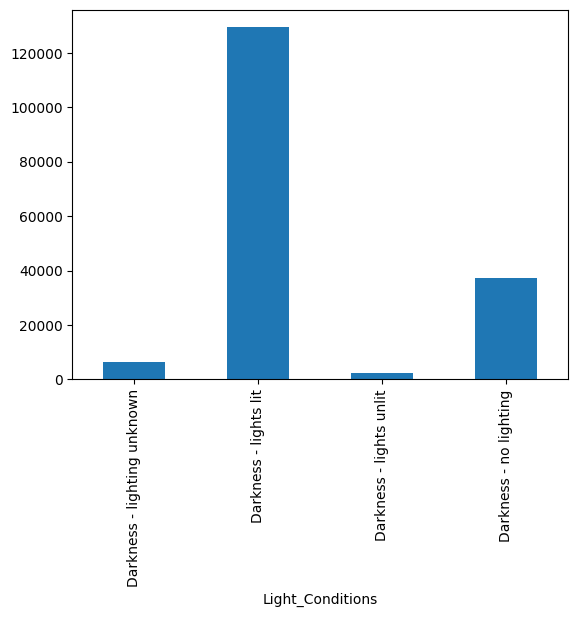

In [45]:
nodaylight_df = ukacc[ukacc['Light_Conditions'] != 'Daylight']
nodaylight_df.groupby('Light_Conditions')['Index'].size().plot(kind='bar')

In [46]:
ukacc.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h2>Insight#26
<h3>There are so much accidents in the day light than any other lighting conditions
<h2>Insight#27
<h3>The Second Lighting COndition to have the most accidents is the Darkness that had Lights Lit
<h2>Insight#27
<h3>No LIghting is third in the bargraph to be having the most accidents other than daylight and darkness with lights lit

<h2>Insight#28
<h3>The Fourth One is  The Darkness With Unknown Lighting
<h2>Insight#29
<h3>The Least Accidents is Darkness With Lights Unlit Due To drivers being careful in places that are dark to prevent accidents

In [47]:
ukacc['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [48]:
oldham_df = ukacc[ukacc['District Area'] == 'Oldham']

In [49]:
locations = list(zip(oldham_df['Latitude'],oldham_df['Longitude']))
m = folium.Map(location=[oldham_df['Latitude'].mean(), oldham_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('oldham_heatmap.html') #to save the map
m

<h2>Insights#30
<h3>There Quite a little Alot of Accidents in OldHam Disctrict

In [50]:
Stockport_df = ukacc[ukacc['District Area'] == 'Stockport']


In [51]:
locations = list(zip(Stockport_df['Latitude'],Stockport_df['Longitude']))
m = folium.Map(location=[Stockport_df['Latitude'].mean(), Stockport_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('Stockport_heatmap.html') #to save the map
m


<h2>Insights#31
<h3>There Quite Alot of Accidents on Stockport most of the accidents are concenstrated on A certain area

In [52]:
Preston_df = ukacc[ukacc['District Area'] == 'Preston']


In [55]:
locations = list(zip(Preston_df['Latitude'],Preston_df['Longitude']))
m = folium.Map(location=[Preston_df['Latitude'].mean(), Preston_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('Preston_heatmap.html') #to save the map
m


<h2>Insights#32
<h3>There Quite a Alot of Accidents on Certain Roads And there quite concentrated in Preston Dsictrict

In [56]:
Chorley_df = ukacc[ukacc['District Area'] == 'Chorley']


In [57]:
locations = list(zip(Chorley_df['Latitude'],Chorley_df['Longitude']))
m = folium.Map(location=[Chorley_df['Latitude'].mean(), Chorley_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('Chorley_heatmap.html') #to save the map
m

<h2>Insights#33
<h3>Theres Only Some Accidents in the Chorley Disctrict not prone to accidents

In [58]:
Burnley_df = ukacc[ukacc['District Area'] == 'Burnley']


In [59]:
locations = list(zip(Burnley_df['Latitude'],Burnley_df['Longitude']))
m = folium.Map(location=[Burnley_df['Latitude'].mean(), Burnley_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('Burnley_heatmap.html') #to save the map
m

<h2>Insights#34
<h3>There Quite a little Alot of Accidents in Burley Disctrict

In [63]:
Norwich_df = ukacc[ukacc['District Area'] == 'Norwich']


In [64]:
locations = list(zip(Norwich_df['Latitude'],Norwich_df['Longitude']))
m = folium.Map(location=[Norwich_df['Latitude'].mean(), Norwich_df['Longitude'].mean()], zoom_start=18)
HeatMap(locations).add_to(m)
m.save('Norwich_heatmap.html') #to save the map
m

<h2>Insights#35
<h3>The accidents are alot more spread out in norwich disctrict